## DATA ANALYTICS: ASSIGNMENT A2



In [1]:
import os
os.getcwd()

'/content'

### Naive Bayes algorithm for classification on Pima Indians Diabetes dataset

- Naive Bayes is a statistical classification technique based on Bayes Theorem
- It is one of the simplest supervised learning algorithms
- Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the data from CSV file 

In [3]:
pid = pd.read_csv('pima-indians-diabetes.csv', names = ['preg', 'plasma', 'blood_pres', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'diab_class'])

In [4]:
pid.head()

,preg,plasma,blood_pres,skin,insulin,bmi,pedigree,age,diab_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Summarize the properties in the training dataset so that we can calculate probabilities and make predictions.

-  The Dataset `pima-indians-diabetes.csv` is generated by <h4>National Institute of Diabetes and Digestive and Kidney Diseases</h4>
- The Type 2 diabetes is a lifelong disease that keeps your body from using insulin the way it should. 
- People with type 2 diabetes are said to have insulin resistance. 
- People who are middle-aged or older are most likely to get this kind of diabetes, so it used to be called adult-onset diabetes

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

- preg = Number of times pregnant

- plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

- blood_pres = Diastolic blood pressure (mm Hg)

- skin = Triceps skin fold thickness (mm)

- insulin = 2-Hour serum insulin (mu U/ml)

- bmi = Body mass index (weight in kg/(height in m)^2)

- pedigree = Diabetes pedigree function

- age = Age (years)

- diab_class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [5]:
pid.describe()

,preg,plasma,blood_pres,skin,insulin,bmi,pedigree,age,diab_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
pid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   preg        768 non-null    int64  
 1   plasma      768 non-null    int64  
 2   blood_pres  768 non-null    int64  
 3   skin        768 non-null    int64  
 4   insulin     768 non-null    int64  
 5   bmi         768 non-null    float64
 6   pedigree    768 non-null    float64
 7   age         768 non-null    int64  
 8   diab_class  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


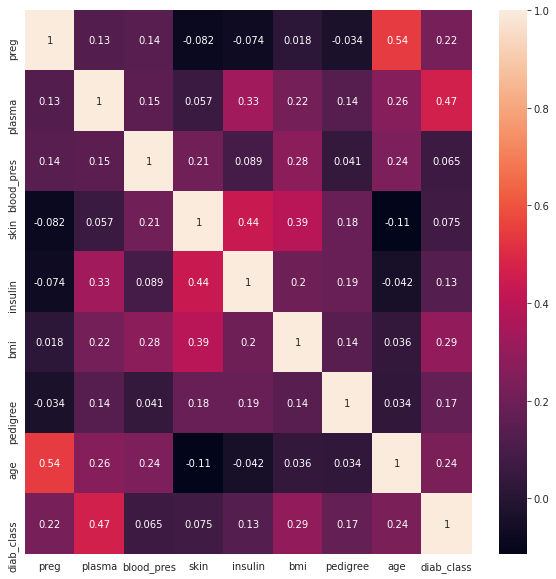

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(pid.corr(), annot = True) 

In [8]:
X = pid.drop('diab_class', axis=1)
y = pid.diab_class

In [9]:
std_scaler = StandardScaler() 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

- Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.
- It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.


- P(h): the probability of hypothesis h being true (regardless of the data). This is known as the prior probability of h.
- P(D): the probability of the data (regardless of the hypothesis). This is known as the prior probability.
- P(h|D): the probability of hypothesis h given the data D. This is known as posterior probability.
- P(D|h): the probability of data d given that the hypothesis h was true. This is known as posterior probability.

In [12]:
nb_model = GaussianNB()

In [13]:
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predict samples from a test dataset

In [14]:
y_pred = nb_model.predict(X_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[102,  22],
       [ 27,  41]])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       124
           1       0.65      0.60      0.63        68

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192

